In [152]:
words = open("names.txt", "r").read().splitlines()

In [153]:
len(words)

32033

In [154]:
import torch

In [155]:
N = torch.zeros((27, 27), dtype = torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {value: index+1 for index, value in enumerate(chars)}
stoi['.'] = 0

itos = {index+1: value for index, value in enumerate(chars)}
itos[0] = '.'

In [156]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

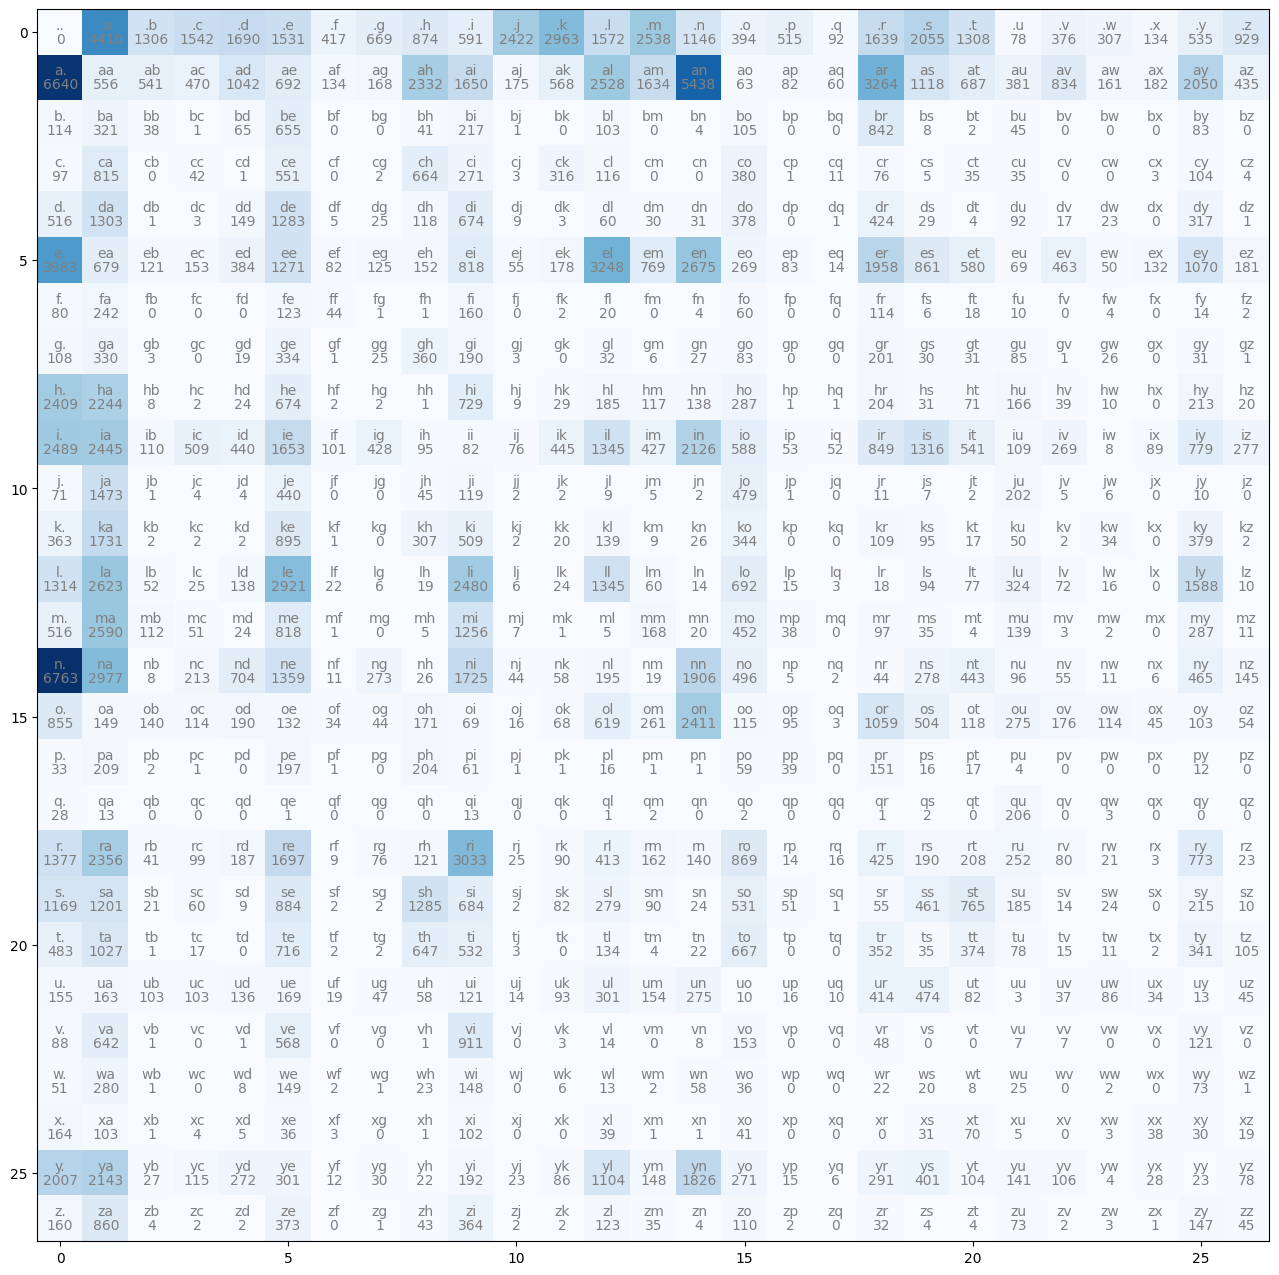

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16)) # increases size of the figure
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        char = itos[i] + itos[j]
        plt.text(j, i, char, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

In [158]:
P = (N).float()
P /= torch.sum(P, 1, keepdim=True)
g = torch.Generator().manual_seed(2147483647)
for i in range(30): # генерируем 10 раз
    out = [] # слово
    ix = 0 # индекс
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # генерируем число от 1 до 26. Делаем следуюзим числом его.
        out.append(itos[ix]) # Переводим в стрингу, добавляем в массив
        if ix == 0: # на EOW прерываем
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.
zem.
deru.
firit.
gaikajahahbevare.
kiysthelenaririenah.
keen.
x.
al.
kal.


In [159]:
logSum = 0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logProb = torch.log(prob)
        logSum += logProb
        n += 1

print(f'{logSum=}')
negativeLogSum = -logSum
print(f'{negativeLogSum=}')
print(f'{negativeLogSum/n:.4f}')

logSum=tensor(-559891.7500)
negativeLogSum=tensor(559891.7500)
2.4541


In [160]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        print(f'{ch1} {ch2}')

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [161]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [162]:
# Входная матрица 5x27 - 5 независимых инпутов, каждый из которых - последовательность из 26 0 и 1 единицы. То есть, за одну итерацию 
# 27 входных данных. А всего итераций 5

# Умножается на матрицу весов 27x1 - один нейрон с 27 edges входных данных
#
# Получаем x1*w1 + x2*w2 + ... + x27 * w27 = число - output нейрона
# Таких чисел 5, так как входных инпутов у нас было 5.


# W = torch.rand((27, 1))
# 5 x 27
# 27 x 1 =>> 5 x 1
# xenc @ W

# https://www.google.com/url?sa=i&url=https%3A%2F%2Fchem.libretexts.org%2FBookshelves%2FPhysical_and_Theoretical_Chemistry_Textbook_Maps%2FMathematical_Methods_in_Chemistry_%2528Levitus%2529%2F15%253A_Matrices%2F15.03%253A_Matrix_Multiplication&psig=AOvVaw3ryj9MivSyxwR2M_ehJRRQ&ust=1736015853627000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCIDtpZaZ2ooDFQAAAAAdAAAAABAE

In [163]:
# Если мы захотим создать 27 нейронов - то мы сделаем так
# W = torch.rand((27, 27))
# и получим аутпут 5х27 - 5 массивов, для пяти инпутов. В каждом 27 чисел - 27 аутпутов нейронов
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g)
layer = xenc @ W
layer = layer.exp()
layer /= torch.sum(layer, 1, keepdim=True)


In [164]:
g = torch.Generator().manual_seed(2147483647)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
xenc = F.one_hot(xs, num_classes = 27).float()
W = torch.randn((27, 27), generator = g, requires_grad=True)

for i in range(100):
    # call neurons 
    logits = xenc @ W
    # softmax
    counts = logits.exp()
    yp = counts / counts.sum(1, keepdim=True)

    # calculate loss
    # logLoss = []
    # for (pred, train) in zip(yp, ys):
    #     pred = pred[train]
    #     pred = -torch.log(pred)
    #     logLoss.append(pred)
    #     print(pred)    
    # print(f'loss = {torch.tensor(logLoss).mean()}')

    loss = -yp[torch.arange(num), ys].log().mean()
    print(f'{loss.item(): .5f}')
    # backward
    W.grad = None
    loss.backward()
    W.data += W.grad * -50
    

 3.75895
 3.37110
 3.15404
 3.02037
 2.92771
 2.86040
 2.80973
 2.77010
 2.73807
 2.71150
 2.68900
 2.66969
 2.65293
 2.63828
 2.62539
 2.61399
 2.60386
 2.59482
 2.58671
 2.57940
 2.57279
 2.56678
 2.56129
 2.55626
 2.55163
 2.54737
 2.54342
 2.53975
 2.53634
 2.53315
 2.53018
 2.52740
 2.52479
 2.52233
 2.52003
 2.51786
 2.51581
 2.51388
 2.51205
 2.51032
 2.50869
 2.50713
 2.50566
 2.50426
 2.50293
 2.50166
 2.50045
 2.49930
 2.49820
 2.49714
 2.49614
 2.49517
 2.49425
 2.49336
 2.49251
 2.49170
 2.49091
 2.49015
 2.48943
 2.48873
 2.48805
 2.48740
 2.48677
 2.48616
 2.48557
 2.48500
 2.48446
 2.48392
 2.48341
 2.48291
 2.48242
 2.48196
 2.48150
 2.48106
 2.48063
 2.48021
 2.47980
 2.47941
 2.47903
 2.47865
 2.47829
 2.47794
 2.47759
 2.47726
 2.47693
 2.47661
 2.47630
 2.47600
 2.47570
 2.47541
 2.47513
 2.47486
 2.47459
 2.47433
 2.47407
 2.47382
 2.47358
 2.47334
 2.47310
 2.47288


In [165]:
next = '.'
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        input_int = torch.tensor([ix])
        input_enc = F.one_hot(input_int, num_classes = 27).float()
        input_logits = input_enc @ W
        input_counts = input_logits.exp()
        p = input_counts / input_counts.sum(1, keepdim=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyauelalerigotai.
moliellavo.
ke.
teda.
